# IRIS dataset classification using ANN

In 1936, the British statistician and biologist Ronald Fisher published The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis.

Two of the three species were collected on the Gaspé Peninsula "all from the same pasture, collected on the same day and measured at the same time by the same person with the same instrument".

The dataset consists of 50 samples from each of the three species of iris.

Four traits were measured for each sample: length and width of calyx and petals in centimetres. 

Identification of the fescue species by the dimensions of the different petals

- https://en.wikipedia.org/wiki/Iris_flower_data_set
- https://www.kaggle.com/arshid/iris-flower-dataset

# Task

Your goal is to create a classification neural network to distinguish different species of killer whales.

We will use the same data as in the k-means/SVM chapter, you can build on it.

As you work through this task, the following points will be completed in turn:

- Retrieve the data and display the basic statistics
- Use binary encoding to prepare the data.
- Standardize the input values using StandardScaler
- Split the data into training, test and validation

- Create a neural network model, don't be afraid to experiment with the number of hidden layers and their size
- You will probably need Dense layers, you can try the Drop layer
- Use a relay as the activation function, use a Softmax layer for the output

- When learning, use the categorical_crossentropy cost function
- The optimization algorithm will be ADAM
- You can collect other accuracy metrics

- Save the learned model to a file

- Test the learned model, find R2 and accuracy
- Plot the substitution matrix

- Plot the learning history

- Test the model on your input data (create inference)

# Data retrieval and basic statistics
- data preview
- basic statistics
- NULL values

In [57]:
import numpy as np
import pandas as pd
data=pd.read_csv('..\dataset\IRIS.csv')

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [59]:
print("First rows of the dataset:")
data.head()

First rows of the dataset:


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [60]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [61]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# Data preparation
- binary encoding
- standardization of input variables

In [62]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['species_enc']=label_encoder.fit_transform(data['species'])

In [63]:
import joblib
joblib.dump(label_encoder, 'classification_encoder.bin', compress=True)

['classification_encoder.bin']

In [64]:
data=data[['sepal_length','sepal_width','petal_length','petal_width', 'species_enc']]
data

,sepal_length,sepal_width,petal_length,petal_width,species_enc
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


# Data visualization
- distribution of values

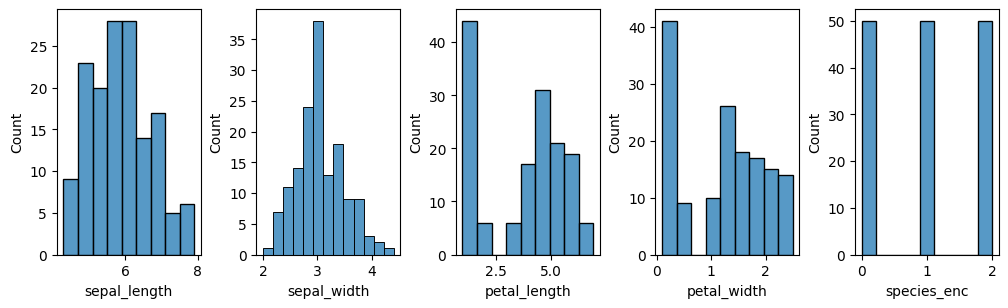

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=5, nrows=1, figsize=(10, 3))
index = 0
axs = axs.flatten()
for k,v in data.items():
    sns.histplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

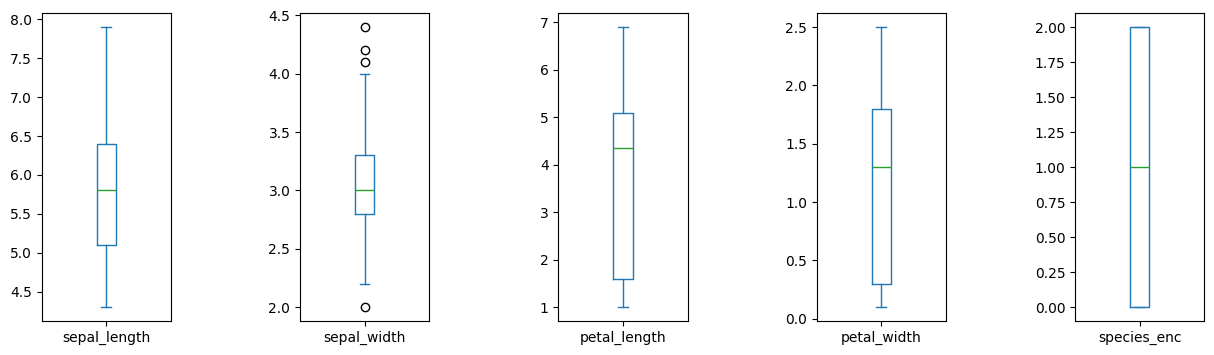

In [66]:
data.plot(
    kind='box', 
    subplots=True, 
    sharey=False, 
    figsize=(15, 4)
)
plt.subplots_adjust(wspace=1) 
plt.show()

<Axes: >

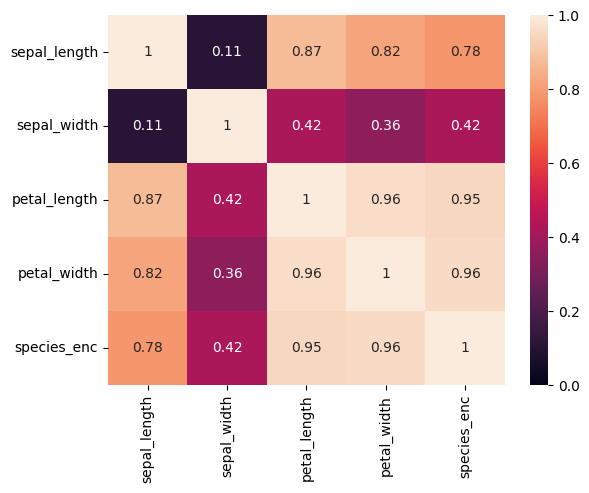

In [67]:
corr=data.corr()
sns.heatmap(corr.abs(), annot=True, vmin=0, vmax=1)

## Neural network modelling

Neural network model
* Sequential model - data flows from the input layer through hidden layers to the output layer.
* Dense layer connects each neuron from the previous layer to each neuron in the layer.
* Drop layer randomly sets the input units to 0 at each step during the training period, which helps prevent overfitting.
* RELU and Softmax activation functions are used. 
* The last Softmax function is used in the output layer because this project is a classification project.

* Compilation is the last step in model building.
* The optimizer we use is Adam. Adam is an optimization algorithm that can be used instead of the classical stochastic gradient descent procedure to iteratively update the network weights based on the training data.
* Cost function - categorical_crossentropy, a special loss function for classification (https://keras.io/api/losses/probabilistic_losses/#categoricalcrossentropy-class).
* Another metric - Accuracy - is computed during learning.


Model: "sequential"
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                80                                                                         
 dropout (Dropout)           (None, 16)                0                                                                          
 dense_1 (Dense)             (None, 16)                272                                                                        
 dropout_1 (Dropout)         (None, 16)                0                                                                          
 dense_2 (Dense)             (None, 3)                 51        
                                                                 
Total params: 403
Trainable params: 403
Non-trainable params: 0

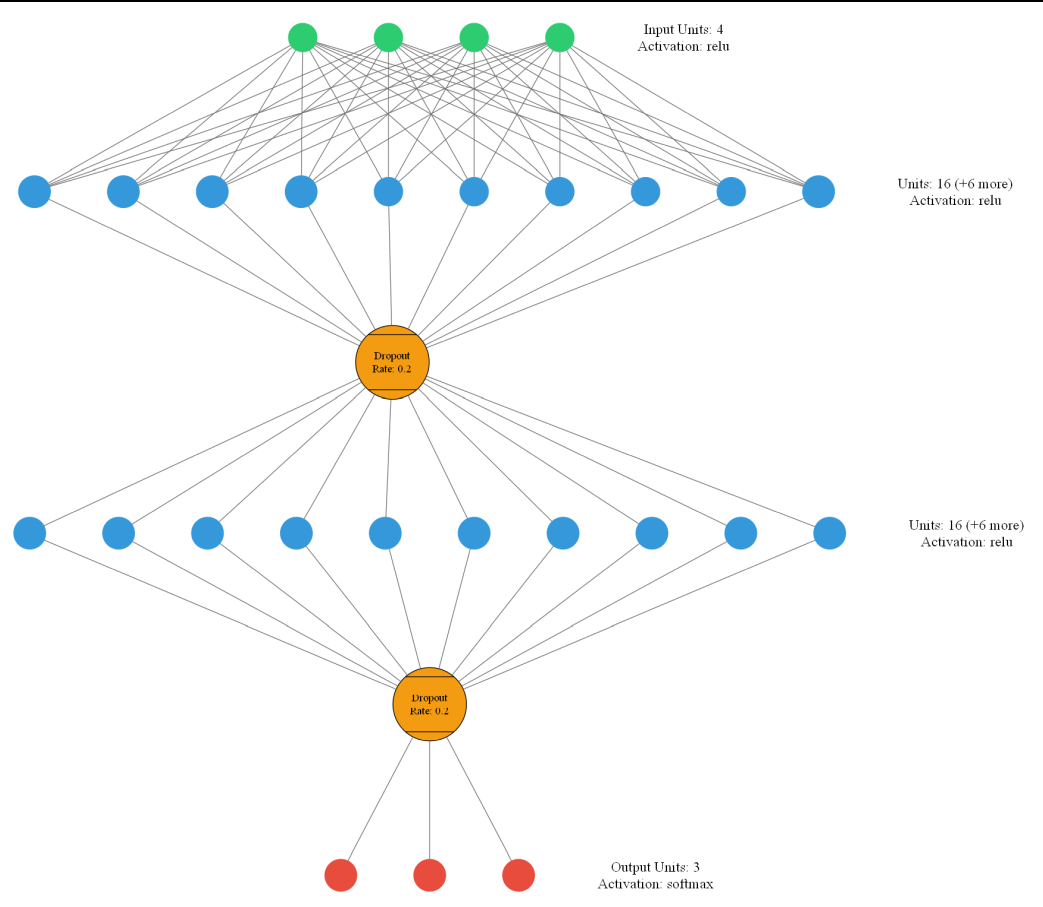

In [68]:
from sklearn.model_selection import train_test_split
X = data[['sepal_length','sepal_width','petal_length','petal_width']].values # Features
Y = data['species_enc']

X_train_ann, X_test_ann, Y_train_ann, Y_test_ann = train_test_split(X, Y, test_size=0.2, random_state=42)

X_train_ann = X_train_ann.astype("float32")/255
X_test_ann = X_test_ann.astype("float32")/255

num_classes = len(np.unique(Y_train_ann))

In [69]:
from keras.utils import to_categorical 
Y_train_ann = to_categorical(Y_train_ann, num_classes=3)
Y_test_ann = to_categorical(Y_test_ann, num_classes=3)

In [70]:

import keras
from keras.layers import Dense, Input
from keras.models import Sequential

In [71]:
model = Sequential()
model.add(Input(shape=(4,)))
model.add(Dense(128, activation = "relu"))
model.add(Dense(64, activation = "relu"))
model.add(Dense(3, activation = 'softmax'))
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 128)            │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,091 (35.51 KB)

 Trainable params: 9,091 (35.51 KB)

 Non-trainable params: 0 (0.00 B)

In [72]:
early_stop = keras.callbacks.EarlyStopping(monitor='accuracy', patience=80)
history=model.fit(X_train_ann, Y_train_ann, epochs=200, batch_size=75, callbacks=[early_stop])

Epoch 1/200


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.3800 - loss: 1.0988 
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6811 - loss: 1.0973
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3611 - loss: 1.0970
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3433 - loss: 1.0966
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.3478 - loss: 1.0963
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3433 - loss: 1.0961
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3433 - loss: 1.0959
Epoch 8/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3300 - loss: 1.0958
Epoch 9/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3433 - loss: 1.0952
Epoch 10/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.3522 - loss: 1.0948
Epoch 11/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3522 - loss: 1.0943
Epoch 12/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3433 - loss: 1.0940


# Save the model

In [73]:
model.save('classification_model_ann.keras')

# Show learning history

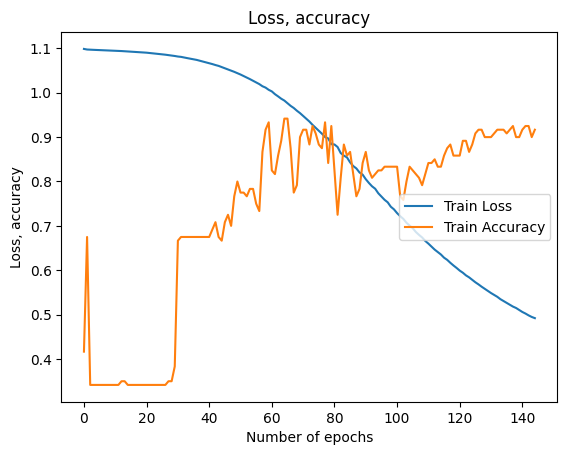

In [74]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.legend(loc="right")
plt.title('Loss, accuracy')
plt.ylabel('Loss, accuracy')
plt.xlabel('Number of epochs')
plt.show()

# Model Verification
- Prediction of test values
- Accuracy
- Confusion matrix of training and test data

In [75]:
Y_pred = model.predict(X_test_ann)
Y_pred_best_answer = np.argmax(Y_pred, axis=-1)
Y_pred_best_answer

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


array([1, 0, 2, 1, 2, 0, 1, 2, 2, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [76]:
Y_test_best_answer=np.argmax(Y_test_ann, axis=-1)
Y_test_best_answer

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

<Axes: >

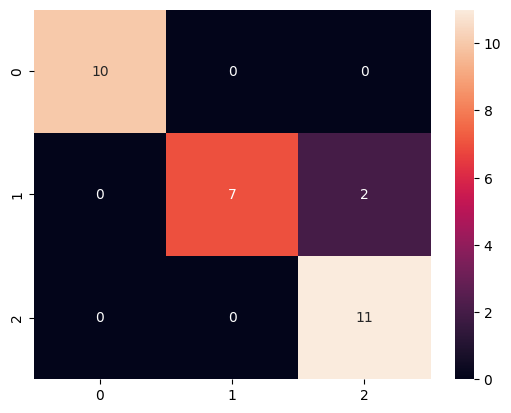

In [77]:
# Confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cf_matrix=confusion_matrix(Y_test_best_answer, Y_pred_best_answer)
sns.heatmap(cf_matrix, annot=True)

# Using the model
The answer should therefore be Iris virginica

In [79]:
x = np.array([[1,2,1,2]], dtype=np.float32)
test_predictions = model.predict(x)
print (f"Iris setosa:     {test_predictions[0][0]}")
print (f"Iris versicolor: {test_predictions[0][1]}")
print (f"Iris virginica:  {test_predictions[0][2]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Iris setosa:     0.0
Iris versicolor: 2.9351055009401823e-24
Iris virginica:  1.0
